## `Pastikan klik 'File > Save a copy in Drive' sebelum memulai pengerjaan`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import BDay

#Dataset

The data used is data sourced from Tokopedia **(not actual data)**. The explanation regarding the dataset is as follows:

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
**order_detail:**
id 			|object| unique order number / id_order
customer_id 		|object| unique customer number
order_date 		|object| transaction date
sku_id 			|object| unique product number (sku is stock keeping unit)
price			|int64| price listed on price tag
qty_ordered 		|int64| quantity of items purchased by customer
before_discount	|float64| total product price (price * qty_ordered)
discount_amount	|float64| total discount amount
after_discount		|float64| total product price after discount
is_gross 		|int64| indicates customer has not paid for the order
is_valid		|int64| indicates customer has made payment
is_net			|int64| indicates transaction is complete
payment_id 		|int64| unique payment method number
||
**sku_detail:**
id |object| unique product number (can be used as a key join)
sku_name 		|object| product name
base_price		|float64| price listed on price tag
cogs 			|int64| cost of goods sold (COGS) / total cost to sell 1 product
category		|object| product category
||
**customer_detail:**
id 			|object| unique customer number
registered_date	|object| customer registration date
||
**payment_detail:**
id			|int64| unique payment method number
payment_method	|object| payment method used


In [2]:
# Data sources used
path_od = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/order_detail.csv"
path_pd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/payment_detail.csv"
path_cd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/customer_detail.csv"
path_sd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/sku_detail.csv"
df_od = pd.read_csv(path_od)
df_pd = pd.read_csv(path_pd)
df_cd = pd.read_csv(path_cd)
df_sd = pd.read_csv(path_sd)

In [3]:
# Display the first 5 rows
df_od.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4


In [4]:
# Display the first 5 rows
df_pd.head()

,id,payment_method
0,1,cod
1,2,jazzvoucher
2,3,customercredit
3,4,Payaxis
4,5,jazzwallet


In [5]:
# Display the first 5 rows
df_cd.head()

,id,registered_date
0,C996508L,2021-07-10
1,C180415L,2021-07-18
2,C535451L,2021-07-23
3,C177843L,2021-07-12
4,C951682L,2021-07-27


In [6]:
# Display the first 5 rows
df_sd.head()

,id,sku_name,base_price,cogs,category
0,P798444,AT-FSM-35,57631.70,46052,Kids & Baby
1,P938347,AYS_Haier-18HNF,3931789.26,3499256,Appliances
2,P826364,Atalian _DV206A-Brown-41,324597.00,243426,Men Fashion
3,P467533,Darul_Sakoon_Food_Bundle,2870.42,2378,Superstore
4,P229955,HP_15AY-15-Ay072NIA-ci3,2265625.00,1631250,Computing


In [7]:
# Running SQL in Colab
from sqlite3 import connect
conn = connect(':memory:')
df_od.to_sql('order_detail',conn, index=False, if_exists='replace')
df_pd.to_sql('payment_detail', conn, index=False, if_exists='replace')
df_sd.to_sql('sku_detail', conn, index=False, if_exists='replace')
df_cd.to_sql('customer_detail', conn, index=False, if_exists='replace')

3998

In [8]:
#Query SQL to merge the data
df = pd.read_sql("""
SELECT
    order_detail.*,
    payment_detail.payment_method,
    sku_detail.sku_name,
    sku_detail.base_price,
    sku_detail.cogs,
    sku_detail.category,
    customer_detail.registered_date
FROM order_detail
LEFT JOIN payment_detail
    on payment_detail.id = order_detail.payment_id
LEFT JOIN sku_detail
    on sku_detail.id = order_detail.sku_id
LEFT JOIN customer_detail
    on customer_detail.id = order_detail.customer_id
""", conn)

In [9]:
# Display the first 5 rows
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100.0,18270,Others,2021-07-07
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5,jazzwallet,PS4_Slim-500GB,1971942.0,1321182,Entertainment,2021-11-20
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000.0,5162580,Entertainment,2021-11-19
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5,jazzwallet,dawlance_Inverter 30,3593680.0,3054628,Appliances,2021-11-03
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220.0,3177472,Appliances,2021-07-05


In [10]:
# Display data type of each column
df.dtypes

,0
id,object
customer_id,object
order_date,object
sku_id,object
price,int64
qty_ordered,int64
before_discount,float64
discount_amount,float64
after_discount,float64
is_gross,int64


In [11]:
# Changing data types for easier data processing
df = df.astype({"before_discount":'int', "discount_amount":'int', "after_discount":'int',"base_price":'int'})
df.dtypes

,0
id,object
customer_id,object
order_date,object
sku_id,object
price,int64
qty_ordered,int64
before_discount,int64
discount_amount,int64
after_discount,int64
is_gross,int64


In [12]:
# Changing the Date column type to Datetime
df['order_date']= pd.to_datetime(df['order_date'])
df['registered_date']= pd.to_datetime(df['registered_date'])
df.dtypes


,0
id,object
customer_id,object
order_date,datetime64[ns]
sku_id,object
price,int64
qty_ordered,int64
before_discount,int64
discount_amount,int64
after_discount,int64
is_gross,int64


## `Number 1`

**Dear Data Analyst**,

By the end of this year, the company will be providing gifts to customers who win the "Year-End Festival" competition. The Marketing Team needs assistance in determining the estimated gifts to be awarded to the competition winners. These gifts will be chosen from the **TOP 5 Products** in the **Mobiles & Tablets category during 2022**, based on the highest sales quantity (valid = 1).

We kindly request your help in submitting this data to the Marketing Team before the end of this month. Thank you for your assistance.


Regards,

**Marketing Team**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan valid = 1
2. Memfilter data dengan Category = Mobiles & Tablets
3. Memfilter data pada transaksi selama 2022
4. Gunakan groupby berdasarkan sku_name
5. Gunakan sort_values untuk mengurutkan data
6. Gunakan head untuk menampilkan top 5 produk


```



</details>

## `Answer No 1`

In [13]:
# Write your code below. More than 1 code block can be used.
# Adding a year column
df['year'] = df['order_date'].dt.year
df

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date,year
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000,2610000,2610000,1,1,0,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100,18270,Others,2021-07-07,2021
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710,2464927,7394782,1,0,0,5,jazzwallet,PS4_Slim-500GB,1971942,1321182,Entertainment,2021-11-20,2021
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000,2065344,5416655,1,0,0,4,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000,5162580,Entertainment,2021-11-19,2021
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680,1455440,2138239,1,1,1,5,jazzwallet,dawlance_Inverter 30,3593680,3054628,Appliances,2021-11-03,2021
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220,1059172,3354047,1,1,1,4,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220,3177472,Appliances,2021-07-05,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5879,ODR4312238651y,C295679L,2022-07-29,P194155,0,2,0,0,0,1,1,0,1,cod,Bahr-e-Shifa,0,0,Books,2022-07-23,2022
5880,ODR3930118778w,C368658L,2022-09-06,P194155,0,1,0,0,0,1,1,1,1,cod,Bahr-e-Shifa,0,0,Books,2022-05-19,2022
5881,ODR7628482404c,C265450L,2022-10-07,P194155,0,3,0,0,0,1,0,0,1,cod,Bahr-e-Shifa,0,0,Books,2022-02-17,2022
5882,ODR2809405363p,C790722L,2022-11-07,P194155,0,2,0,0,0,1,1,1,1,cod,Bahr-e-Shifa,0,0,Books,2021-11-19,2022


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5884 entries, 0 to 5883
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               5884 non-null   object        
 1   customer_id      5884 non-null   object        
 2   order_date       5884 non-null   datetime64[ns]
 3   sku_id           5884 non-null   object        
 4   price            5884 non-null   int64         
 5   qty_ordered      5884 non-null   int64         
 6   before_discount  5884 non-null   int64         
 7   discount_amount  5884 non-null   int64         
 8   after_discount   5884 non-null   int64         
 9   is_gross         5884 non-null   int64         
 10  is_valid         5884 non-null   int64         
 11  is_net           5884 non-null   int64         
 12  payment_id       5884 non-null   int64         
 13  payment_method   5884 non-null   object        
 14  sku_name         5884 non-null   object 

In [15]:
# Filtering data by is_valid = 1, category 'Mobiles & Tablets', in the year 2022
cond_a1 = df['is_valid'] == 1
cond_a2 = df['category'] == 'Mobiles & Tablets'
cond_a3 = df['year'] == 2022

df_1 = df[(cond_a1) & (cond_a2) & (cond_a3)]
df_1

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date,year
20,ODR2268957100j,C813380L,2022-04-16,P619324,5626000,1,5626000,348000,5278000,1,1,1,7,Easypay,Samsung_Galaxy_S8_Plus_Black,5626000,4782100,Mobiles & Tablets,2022-04-05,2022
300,ODR4269164386x,C460487L,2022-09-06,P313303,518752,1000,518752000,0,518752000,1,1,1,2,jazzvoucher,IDROID_BALRX7-Gold,550942,484822,Mobiles & Tablets,2022-06-21,2022
334,ODR2855118495m,C835857L,2022-07-03,P754831,550942,26,14324492,0,14324492,1,1,1,16,financesettlement,IDROID_BALRX7-Jet black,550942,429722,Mobiles & Tablets,2022-03-04,2022
350,ODR1542623352b,C501323L,2022-07-23,P539142,3769942,3,11309826,0,11309826,1,1,0,4,Payaxis,cc_samsung_G935F-Blue,3614560,2530192,Mobiles & Tablets,2022-07-21,2022
355,ODR4709500777n,C179537L,2022-07-26,P652031,5170642,2,10341284,0,10341284,1,1,0,4,Payaxis,Samsung-Galaxy-S8-G955-Plus-Black,5170642,4033088,Mobiles & Tablets,2022-07-19,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,ODR8298392594n,C168876L,2022-01-27,P754831,550942,5,2754710,0,2754710,1,1,1,1,cod,IDROID_BALRX7-Jet black,550942,429722,Mobiles & Tablets,2022-01-27,2022
1356,ODR9882171572h,C160493L,2022-06-05,P591007,2250342,1,2250342,0,2250342,1,1,1,1,cod,cc_samsung_A520-Gold,2170534,1801538,Mobiles & Tablets,2021-08-28,2022
1455,ODR7212779917l,C139855L,2022-01-22,P591474,1972000,1,1972000,0,1972000,1,1,0,1,cod,samsung_Samsung Galaxy J7 PRIME 2016-Gold,1943000,1515540,Mobiles & Tablets,2021-07-09,2022
1482,ODR2441502672n,C347731L,2022-07-08,P230358,1913942,1,1913942,0,1913942,1,1,0,4,Payaxis,cc_samsung_a320-Gold,1861800,1414968,Mobiles & Tablets,2022-08-05,2022


In [16]:
# Grouping by product name
df1_groupby = df_1.groupby(by = ['sku_name'])['qty_ordered'].sum()
df1_groupby

,qty_ordered
sku_name,
Apple iPhone 6S Plus 16GB Silver,3
IDROID_BALRX7-Gold,1000
IDROID_BALRX7-Jet black,31
Infinix Hot 4-Gold,15
MotoZPlay -Black,1
MotoZPlay-White,1
Samsung-Galaxy-S8-G955-Plus-Black,5
Samsung_A7-2017-Gold,2
Samsung_Galaxy_S8_Plus_Black,1


In [17]:
# Sorting the top 5 best-selling products
df1_top = df1_groupby.sort_values(
    ascending = False
)
df1_top.head(5)

,qty_ordered
sku_name,
IDROID_BALRX7-Gold,1000
IDROID_BALRX7-Jet black,31
Infinix Hot 4-Gold,15
samsung_Grand Prime Plus-Black,11
infinix_Zero 4-Grey,10


## `Number 2`
**Dear Data Analyst**,
<br></br>
Following the joint meeting between the Warehouse Team and the Marketing Team, we found that the stock availability for products in the 'Others' Category at the end of 2022 was still high.

1.   We kindly request your assistance in checking the sales data for this category, comparing sales quantities in 2022 with 2021. Our preliminary suspicion is that there was a decrease in sales quantity in 2022 compared to 2021. (Please also display data for all 15 categories).

2.   If indeed there was a decrease in sales quantity for the 'Others' category, we request your help in providing data for the TOP 20 product names that experienced the highest decline in sales quantity in 2022 compared to 2021. This data will be used for discussion in our next meeting.

Please kindly send this data no later than 4 days from today. Thank you for your assistance.
<br></br>
Regards

**Werehouse Team**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan valid = 1
2. Memfilter data pada transaksi selama 2021
3. Memfilter data pada transaksi selama 2022
4. Gunakan groupby berdasarkan sku_name masing-masing tahun
5. Menggabungkan kedua data dengan merge
6. Lakukan pengurangan kolom qty 2022 dengan qty 2021


```



</details>

## `Answer No 2.1`

In [18]:
# Write your code below. More than 1 code block can be used.
# Filtering is_valid = 1 in 2021
cond_2a1 = df['is_valid'] == 1
cond_2a2 = df['year'] == 2021

df_2021 = df[(cond_2a1) & (cond_2a2)]
df_2021

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date,year
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000,2610000,2610000,1,1,0,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100,18270,Others,2021-07-07,2021
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680,1455440,2138239,1,1,1,5,jazzwallet,dawlance_Inverter 30,3593680,3054628,Appliances,2021-11-03,2021
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220,1059172,3354047,1,1,1,4,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220,3177472,Appliances,2021-07-05,2021
11,ODR2741972772y,C483469L,2021-11-21,P239399,3683000,1,3683000,552450,3130550,1,1,1,2,jazzvoucher,Honda_BikeCD70-Black,3683000,3130550,Superstore,2021-07-26,2021
12,ODR5064165483d,C329053L,2021-11-23,P239399,3683000,1,3683000,552450,3130550,1,1,1,2,jazzvoucher,Honda_BikeCD70-Black,3683000,3130550,Superstore,2021-09-20,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5840,ODR3887969824x,C715596L,2021-04-12,P791570,5800,1,5800,0,5800,1,1,1,1,cod,BSSN_Waist Belt Logo on Buckle-Large,5800,4292,School & Education,2021-12-25,2021
5847,ODR5922356497n,C279618L,2021-12-23,P328629,2900,1,2900,0,2900,1,1,1,4,Payaxis,Topline_Understanding Times Tables,2900,1856,Books,2021-12-04,2021
5848,ODR1355309619g,C323695L,2021-08-24,P153186,2088,1,2088,0,2088,1,1,1,1,cod,STBB_Selections from english verse 1st & 2nd Y...,2088,1508,School & Education,2021-08-02,2021
5853,ODR2206904426f,C794109L,2021-09-25,P587474,290,2,580,0,580,1,1,0,4,Payaxis,Trans2_LW 999,464,290,Others,2021-09-17,2021


In [19]:
# Grouping sales data in 2021 by product name
df2021_groupby = df_2021.groupby(by = 'category')['qty_ordered'].sum()
df2021_groupby

,qty_ordered
category,
Appliances,124
Beauty & Grooming,168
Books,171
Computing,109
Entertainment,77
Health & Sports,173
Home & Living,193
Kids & Baby,170
Men Fashion,237


In [20]:
# Filtering is_valid = 1 in 2022
cond_2a3 = df['year'] == 2022

df_2022 = df[(cond_2a1) & (cond_2a3)]
df_2022

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date,year
6,ODR7610732813d,C313534L,2022-12-01,P849301,2697000,1,2697000,809100,1887900,1,1,1,1,cod,mitsubhisi_1.0 Ton - SRK-13CMK-CS,2697000,2373360,Appliances,2022-01-19,2022
7,ODR4415476736l,C215074L,2022-12-01,P918122,2533672,1,2533672,760101,1773570,1,1,0,3,customercredit,lenovo_80HR00AKUE,2456010,2063002,Computing,2021-09-13,2022
16,ODR8451284001a,C805381L,2022-05-22,P726605,3278450,1,3278450,406000,2872450,1,1,1,4,Payaxis,Ifitness_JW901,3335000,2901450,Health & Sports,2022-04-13,2022
20,ODR2268957100j,C813380L,2022-04-16,P619324,5626000,1,5626000,348000,5278000,1,1,1,7,Easypay,Samsung_Galaxy_S8_Plus_Black,5626000,4782100,Mobiles & Tablets,2022-04-05,2022
26,ODR2463904091r,C869172L,2022-04-15,P873818,841000,2,1682000,254887,1427112,1,1,0,1,cod,SNU_Tena-Durrani-TD16W-Kelly,841000,529830,Women Fashion,2022-01-20,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5877,ODR6864259419h,C714630L,2022-07-25,P194155,0,3,0,0,0,1,1,0,1,cod,Bahr-e-Shifa,0,0,Books,2022-06-24,2022
5878,ODR8376183747r,C300950L,2022-07-28,P194155,0,1,0,0,0,1,1,0,1,cod,Bahr-e-Shifa,0,0,Books,2021-09-05,2022
5879,ODR4312238651y,C295679L,2022-07-29,P194155,0,2,0,0,0,1,1,0,1,cod,Bahr-e-Shifa,0,0,Books,2022-07-23,2022
5880,ODR3930118778w,C368658L,2022-09-06,P194155,0,1,0,0,0,1,1,1,1,cod,Bahr-e-Shifa,0,0,Books,2022-05-19,2022


In [21]:
# Grouping sales data in 2022 by product name
df2022_groupby = df_2022.groupby(by = 'category')['qty_ordered'].sum()
df2022_groupby

,qty_ordered
category,
Appliances,148
Beauty & Grooming,153
Books,195
Computing,153
Entertainment,150
Health & Sports,200
Home & Living,250
Kids & Baby,227
Men Fashion,175


In [23]:
# Merging product sales data columns for 2021 and 2022
df21_merge = pd.merge(df2021_groupby, df2022_groupby, on = 'category', how = 'outer')
df21_merge = df21_merge.rename(columns = {'qty_ordered_x' : 'qty_2021', 'qty_ordered_y' : 'qty_2022'})
df21_merge

,qty_2021,qty_2022
category,,
Appliances,124,148
Beauty & Grooming,168,153
Books,171,195
Computing,109,153
Entertainment,77,150
Health & Sports,173,200
Home & Living,193,250
Kids & Baby,170,227
Men Fashion,237,175


In [24]:
# Analyzing product sales growth from 2021 to 2022
df21_merge['growth'] = df21_merge['qty_2022'] - df21_merge['qty_2021']
df21_merge = df21_merge.sort_values(
    by= ['growth'],
    ascending=True)
df21_merge

,qty_2021,qty_2022,growth
category,,,
Others,426,263,-163
Soghaat,759,612,-147
Men Fashion,237,175,-62
Beauty & Grooming,168,153,-15
Books,171,195,24
Appliances,124,148,24
Health & Sports,173,200,27
Computing,109,153,44
School & Education,184,237,53


## `Answer No 2.2`

In [34]:
# Write your code below. More than 1 code block can be used.
# Filtering sales data for the 'Others' category in 2021 with is_valid = 1
cond_2b1 = df['category'] == 'Others'
cond_2b2 = df['is_valid'] == 1
cond_2b3 = df['year'] == 2021

df_2b_2021 = df[(cond_2b1) & (cond_2b2) & (cond_2b3)]
df_2b_2021

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date,year
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000,2610000,2610000,1,1,0,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100,18270,Others,2021-07-07,2021
167,ODR9685127759j,C856079L,2021-11-26,P171657,184440,1,184440,29000,155440,1,1,1,2,jazzvoucher,MEGUIAR_G18211,184440,130906,Others,2021-11-27,2021
286,ODR6179308986q,C985354L,2021-11-22,P531621,145000,2,290000,4754,285245,1,1,1,3,customercredit,sindbad_Sindbad Gift Card-3,145000,118900,Others,2021-10-02,2021
845,ODR2281221787f,C588794L,2021-10-11,P139750,4292000,1,4292000,0,4292000,1,1,1,3,customercredit,Haier_HSU-18HZE-R2-DB DC Inverter,4292000,3519440,Others,2021-10-10,2021
1098,ODR1163914893g,C469416L,2021-12-25,P877152,3219000,1,3219000,0,3219000,1,1,0,1,cod,HP_AB201TUN8L18PA,3219000,2832720,Others,2021-12-20,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5697,ODR5318693292w,C328276L,2021-12-13,P738924,20242,1,20242,0,20242,1,1,1,1,cod,Telemall_MM-DR-HB-L,20242,15370,Others,2021-12-15,2021
5698,ODR8798991003u,C883450L,2021-12-20,P738924,20242,1,20242,0,20242,1,1,1,1,cod,Telemall_MM-DR-HB-L,20242,15370,Others,2021-11-06,2021
5826,ODR2967500173q,C631413L,2021-12-09,P464743,7830,1,7830,0,7830,1,1,1,1,cod,pakistan_Pakistan Car Flag,7830,5046,Others,2021-09-17,2021
5834,ODR9211138878s,C156505L,2021-09-07,P982256,6960,1,6960,0,6960,1,1,1,1,cod,ld_fruit-STRAWBERRY,6960,4988,Others,2021-07-28,2021


In [35]:
# Grouping 'Others' sales data in 2021 by sku_name
df2b_groupby21 = df_2b_2021.groupby(by=['sku_name'])['qty_ordered'].sum()
df2b_groupby21

,qty_ordered
sku_name,
Aladdin_Wrench_Snap N Grip_01,1
Aladdin_bike_cover,3
Am-PTV_ATS-004-M,5
BFV_Black Friday voucher Rs 1500,1
BFV_Black Friday voucher Rs 2000,1
...,...
sstop_Universallensclipkit,2
stoner_95160,1
stripyinterior_100006,1


In [36]:
# Filtering sales data for the 'Others' category in 2022 with is_valid = 1
cond_2b4 = df['year'] == 2022
df_2b_2022 = df[(cond_2b1) & (cond_2b2) & (cond_2b4)]
df_2b_2022

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date,year
79,ODR5050363774l,C157544L,2022-06-16,P497470,522000,1,522000,84100,437900,1,1,0,4,Payaxis,Voucher 9000,522000,459360,Others,2021-11-18,2022
125,ODR3678705048c,C157544L,2022-04-05,P753586,348000,1,348000,52200,295800,1,1,0,4,Payaxis,Voucher 6000,348000,219240,Others,2021-11-18,2022
129,ODR8294249799k,C217289L,2022-06-15,P850836,116000,2,232000,46400,185600,1,1,1,4,Payaxis,Saylani_Health-Contribution-Package-1,116000,96280,Others,2022-05-07,2022
130,ODR9190651304u,C607220L,2022-08-13,P711218,130500,1,130500,45675,84825,1,1,1,4,Payaxis,Charizma_DG35,130500,112230,Others,2021-11-16,2022
133,ODR1189102251d,C421614L,2022-06-17,P251175,58000,2,116000,40600,75400,1,1,1,4,Payaxis,Saylani_School-Fee-Per-Month-One-Child,58000,38280,Others,2021-07-09,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5743,ODR7545821885d,C597660L,2022-06-27,P259018,17110,1,17110,0,17110,1,1,1,1,cod,Rajesh_RAJ036,17110,11774,Others,2021-10-23,2022
5744,ODR3921924712z,C455011L,2022-07-21,P259018,17110,1,17110,0,17110,1,1,1,1,cod,Rajesh_RAJ036,17110,11774,Others,2022-07-20,2022
5807,ODR8524713483g,C900524L,2022-09-08,P561307,9570,1,9570,0,9570,1,1,0,1,cod,AL Khair_Baby Oil 50ml,9570,8004,Others,2022-03-27,2022
5852,ODR8182513033k,C355357L,2022-05-13,P800680,638,1,638,0,638,1,1,0,1,cod,test-product-00,290,174,Others,2022-05-01,2022


In [37]:
# Grouping 'Others' sales data in 2022 by sku_name
df2b_groupby22 = df_2b_2022.groupby(by=['sku_name'])['qty_ordered'].sum()
df2b_groupby22

,qty_ordered
sku_name,
AL Khair_Baby Oil 50ml,1
Aladdin_bike_cover,2
Alerashine_sku-09-XL,1
Audionic_6-954217-510248,1
BO_Pack of 6 - Non-Stick Cooking Utensils - Black,1
...,...
stoner_91381 A,1
stripyinterior_100004,1
sukoonbundle-sukoon10-cj_CJPOISL,1


In [39]:
# Merging sales data for 'Others' category products in 2021 and 2022
df22_merge = pd.merge(df2b_groupby21, df2b_groupby22, on = 'sku_name', how='outer')
df22_merge

,qty_ordered_x,qty_ordered_y
sku_name,,
AL Khair_Baby Oil 50ml,NaN,1.0
Aladdin_Wrench_Snap N Grip_01,1.0,NaN
Aladdin_bike_cover,3.0,2.0
Alerashine_sku-09-XL,NaN,1.0
Am-PTV_ATS-004-M,5.0,NaN
...,...,...
stripyinterior_100006,1.0,NaN
sukoonbundle-sukoon10-cj_CJPOISL,NaN,1.0
test-product-00,NaN,1.0


In [40]:
# Filling NaN cells with 0, and renaming the qty_ordered column
df22_merge.fillna(0, inplace=True)
df22_merge = df22_merge.rename(columns = {'qty_ordered_x':'qty_2021', 'qty_ordered_y':'qty_2022'})
df22_merge

,qty_2021,qty_2022
sku_name,,
AL Khair_Baby Oil 50ml,0.0,1.0
Aladdin_Wrench_Snap N Grip_01,1.0,0.0
Aladdin_bike_cover,3.0,2.0
Alerashine_sku-09-XL,0.0,1.0
Am-PTV_ATS-004-M,5.0,0.0
...,...,...
stripyinterior_100006,1.0,0.0
sukoonbundle-sukoon10-cj_CJPOISL,0.0,1.0
test-product-00,0.0,1.0


In [41]:
# Analyzing the sales decrease and sorting from lowes
df22_merge['growth'] = df22_merge['qty_2022'] - df22_merge['qty_2021']
df22_merge = df22_merge.sort_values(
    by=['growth'],
    ascending=True
)
df22_merge.head(20)

,qty_2021,qty_2022,growth
sku_name,,,
RB_Dettol Germ Busting Kit-bf,200.0,45.0,-155.0
Dawlance_MD 10 + DWB 600,23.0,0.0,-23.0
Telemall_MM-DR-HB-L,23.0,2.0,-21.0
iu_Tickets General Enclosure-Islamabad,20.0,0.0,-20.0
RS_Rehmat-e-Shereen Mix Mithai,13.0,0.0,-13.0
kansai_NeverWet,10.0,1.0,-9.0
sindbad_Sindbad Gift Card-3,7.0,0.0,-7.0
emart_00-1,7.0,1.0,-6.0
Vouch 365 2016,5.0,0.0,-5.0


## `Number 3`
**Dear Data Analyst**,
<br></br>
Regarding the company's anniversary in 2 months, the Digital Marketing Team will provide promotional information to customers at the end of this month. The customer criteria we need are those who have checked out but have not yet made payment (is_gross = 1) during 2022. The data we require is Customer ID and Registered Date.

We kindly request your assistance in sending this data to the Digital Marketing Team before the end of this month. Thank you for your help.
<br></br>
Regards

**Digital Marketing Team**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan gross = 1
2. Memfilter data dengan valid = 0
3. Memfilter data dengan net = 0
4. Memfilter data pada transaksi selama 2022


```



</details>

## `Answer No 3`

In [43]:
# Write your code below. More than 1 code block can be used.
# Filtering data is_gross = 1, is_valid = 0, dan is_net = 0 in 2022
cond_c1 = df['is_gross'] == 1
cond_c2 = df['is_net'] == 0
cond_c3 = df['is_valid'] == 0
cond_c4 = df['year'] == 2022

df_3 = df[(cond_c1) & (cond_c2) & (cond_c3) & (cond_c4)]
df_3

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date,year
9,ODR9699658949w,C246762L,2022-05-21,P168052,6487648,1,6487648,638000,5849648,1,0,0,7,Easypay,iPhone7Plus-Red-256GB,6487648,5125228,Mobiles & Tablets,2022-05-08,2022
18,ODR1965502162e,C848774L,2022-05-20,P168052,6487648,1,6487648,364812,6122835,1,0,0,2,jazzvoucher,iPhone7Plus-Red-256GB,6487648,5125228,Mobiles & Tablets,2021-11-07,2022
19,ODR8450052777q,C693415L,2022-04-15,P132718,5626000,1,5626000,348000,5278000,1,0,0,7,Easypay,Samsung_Galaxy_S8_Plus_Gray,5626000,4219500,Mobiles & Tablets,2022-04-12,2022
21,ODR7673587024b,C180595L,2022-04-17,P619324,5626000,1,5626000,348000,5278000,1,0,0,7,Easypay,Samsung_Galaxy_S8_Plus_Black,5626000,4782100,Mobiles & Tablets,2022-04-22,2022
22,ODR7333927150n,C587425L,2022-12-04,P619324,5626000,1,5626000,348000,5278000,1,0,0,7,Easypay,Samsung_Galaxy_S8_Plus_Black,5626000,4782100,Mobiles & Tablets,2022-03-22,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5856,ODR2291109358n,C394076L,2022-02-22,P800680,58,2,116,0,116,1,0,0,4,Payaxis,test-product-00,290,174,Others,2021-10-12,2022
5859,ODR4338250762i,C248585L,2022-01-08,P194155,0,3,0,0,0,1,0,0,1,cod,Bahr-e-Shifa,0,0,Books,2022-07-10,2022
5865,ODR4656313388n,C471304L,2022-05-16,P194155,0,1,0,0,0,1,0,0,6,easypay_voucher,Bahr-e-Shifa,0,0,Books,2022-05-13,2022
5881,ODR7628482404c,C265450L,2022-10-07,P194155,0,3,0,0,0,1,0,0,1,cod,Bahr-e-Shifa,0,0,Books,2022-02-17,2022


In [44]:
# Displaying only customer ID and registered date, then sorting by registered date
df_3 = df_3[['customer_id', 'registered_date']]
df_3 = df_3.sort_values(
    by = ['registered_date'],
    ascending=True
)
df_3

,customer_id,registered_date
4168,C349980L,2021-07-02
3021,C849967L,2021-07-02
1304,C378684L,2021-07-03
606,C831683L,2021-07-03
1365,C378684L,2021-07-03
...,...,...
2335,C877563L,2022-08-24
157,C788348L,2022-08-25
3512,C741725L,2022-08-25
315,C925840L,2022-08-28


In [45]:
# Drop duplicates
df3_unique = df_3.drop_duplicates(subset=['customer_id'])
df3_unique

,customer_id,registered_date
4168,C349980L,2021-07-02
3021,C849967L,2021-07-02
1304,C378684L,2021-07-03
606,C831683L,2021-07-03
1331,C893754L,2021-07-03
...,...,...
2335,C877563L,2022-08-24
157,C788348L,2022-08-25
3512,C741725L,2022-08-25
315,C925840L,2022-08-28


In [ ]:
# Run this code to download file
from google.colab import files
[df3_unique file].to_csv('audience_list.csv', encoding = 'utf-8-sig',index=False) #ganti [nama variabel file] dengan nama variabel yang digunakan
files.download('audience_list.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## `Number 4`
**Dear Data Analyst**,
<br></br>
From October to December 2022, we conducted campaigns every Saturday and Sunday. We want to assess whether these campaigns had a significant impact on sales increase (before_discount). Please help us display the following data:

1.   Daily average sales for weekends (Saturday and Sunday) vs. daily average sales for weekdays (Monday-Friday) for each respective month. Was there a sales increase in each of these months?
2.   Daily average sales for weekends (Saturday and Sunday) vs. daily average sales for weekdays (Monday-Friday) for the entire three-month period.

Please send this data no later than next week. Thank you for your assistance.
<br></br>
Regards

**Campaign Team**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Buatlah kolom baru untuk day, month, dan month number
2. Memfilter data dengan valid = 1
3. Memfilter data dengan day termasuk 'Saturday', 'Sunday' dengan menggunakan fungsi isin dan simpan dalam variable 'weekends'
4. Memfilter data dengan day termasuk 'Monday','Tuesday','Wednesday','Thusday','Friday' dengan menggunakan fungsi isin dan simpan dengan variabel 'weekday'
5. Memfilter data pada transaksi selama 2022 bulan Oktober sampai dengan Desember
6. Gunakan groupby berdasarkan pada masing-masing variabel
7. Menggabungkan kedua data dengan merge
8. Tampilkan pada grafik batang untuk melihat perbedaananya


```



</details>

## `Answer No 4.1`

Determining the before_discount sales table for October - December 2022

In [46]:
# Write your code below. More than 1 code block can be used.
# Creating new columns: day, month, and month_number
df['day'] = df['order_date'].dt.day_name()
df['month'] = df['order_date'].dt.month_name()
df['month_numb'] = df['order_date'].dt.month
df

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,...,payment_method,sku_name,base_price,cogs,category,registered_date,year,day,month,month_numb
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000,2610000,2610000,1,...,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100,18270,Others,2021-07-07,2021,Friday,November,11
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710,2464927,7394782,1,...,jazzwallet,PS4_Slim-500GB,1971942,1321182,Entertainment,2021-11-20,2021,Friday,November,11
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000,2065344,5416655,1,...,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000,5162580,Entertainment,2021-11-19,2021,Thursday,November,11
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680,1455440,2138239,1,...,jazzwallet,dawlance_Inverter 30,3593680,3054628,Appliances,2021-11-03,2021,Monday,November,11
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220,1059172,3354047,1,...,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220,3177472,Appliances,2021-07-05,2021,Sunday,November,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5879,ODR4312238651y,C295679L,2022-07-29,P194155,0,2,0,0,0,1,...,cod,Bahr-e-Shifa,0,0,Books,2022-07-23,2022,Friday,July,7
5880,ODR3930118778w,C368658L,2022-09-06,P194155,0,1,0,0,0,1,...,cod,Bahr-e-Shifa,0,0,Books,2022-05-19,2022,Tuesday,September,9
5881,ODR7628482404c,C265450L,2022-10-07,P194155,0,3,0,0,0,1,...,cod,Bahr-e-Shifa,0,0,Books,2022-02-17,2022,Friday,October,10
5882,ODR2809405363p,C790722L,2022-11-07,P194155,0,2,0,0,0,1,...,cod,Bahr-e-Shifa,0,0,Books,2021-11-19,2022,Monday,November,11


In [47]:
# Filtering sales data with is_valid = 1 for October - December 2022
cond_d1 = df['month_numb'].isin([10, 11, 12])
cond_d2 = df['year'] == 2022
cond_d3 = df['is_valid'] == 1

df_4 = df[(cond_d1) & (cond_d2) & (cond_d3)]
df_4

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,...,payment_method,sku_name,base_price,cogs,category,registered_date,year,day,month,month_numb
6,ODR7610732813d,C313534L,2022-12-01,P849301,2697000,1,2697000,809100,1887900,1,...,cod,mitsubhisi_1.0 Ton - SRK-13CMK-CS,2697000,2373360,Appliances,2022-01-19,2022,Thursday,December,12
7,ODR4415476736l,C215074L,2022-12-01,P918122,2533672,1,2533672,760101,1773570,1,...,customercredit,lenovo_80HR00AKUE,2456010,2063002,Computing,2021-09-13,2022,Thursday,December,12
34,ODR3138948564v,C609754L,2022-11-06,P622378,1195902,1,1195902,174000,1021902,1,...,Payaxis,AYS_32-32G6530,1195902,1076306,Entertainment,2022-06-22,2022,Sunday,November,11
35,ODR6438394533v,C795052L,2022-11-06,P196053,918952,1,918952,174000,744952,1,...,Payaxis,Delsey_384182100,918952,698378,Home & Living,2022-05-18,2022,Sunday,November,11
36,ODR1691826218q,C118563L,2022-11-06,P748128,762062,1,762062,174000,588062,1,...,Easypay,HP_PRINTER-LJ-M102AW,762062,609638,Computing,2022-06-07,2022,Sunday,November,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5614,ODR3662257747q,C825085L,2022-10-06,P887047,28710,1,28710,0,28710,1,...,cod,BP_PS00398,28710,22388,Books,2022-06-05,2022,Thursday,October,10
5777,ODR4690669141l,C856545L,2022-12-06,P194155,12818,1,12818,0,12818,1,...,cod,Bahr-e-Shifa,0,0,Books,2022-06-25,2022,Tuesday,December,12
5822,ODR7321143126q,C221220L,2022-10-02,P721905,8700,1,8700,0,8700,1,...,cod,Paramount_9694941660,8700,5742,Books,2022-02-19,2022,Sunday,October,10
5828,ODR8470686220b,C951682L,2022-10-01,P849717,7540,1,7540,0,7540,1,...,cod,Zia_147,7540,4640,Books,2021-07-27,2022,Saturday,October,10


In [48]:
# Filtering weekend data
weekend = df_4['day'].isin(['Saturday', 'Sunday'])

df4_weekend = df_4[(weekend)]
df4_weekend

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,...,payment_method,sku_name,base_price,cogs,category,registered_date,year,day,month,month_numb
34,ODR3138948564v,C609754L,2022-11-06,P622378,1195902,1,1195902,174000,1021902,1,...,Payaxis,AYS_32-32G6530,1195902,1076306,Entertainment,2022-06-22,2022,Sunday,November,11
35,ODR6438394533v,C795052L,2022-11-06,P196053,918952,1,918952,174000,744952,1,...,Payaxis,Delsey_384182100,918952,698378,Home & Living,2022-05-18,2022,Sunday,November,11
36,ODR1691826218q,C118563L,2022-11-06,P748128,762062,1,762062,174000,588062,1,...,Easypay,HP_PRINTER-LJ-M102AW,762062,609638,Computing,2022-06-07,2022,Sunday,November,11
40,ODR4788160083h,C809015L,2022-11-06,P607644,547230,1,547230,164169,383061,1,...,Easypay,sehgalmotors_6508,547230,388484,Superstore,2022-06-13,2022,Sunday,November,11
73,ODR6596011115s,C284236L,2022-11-05,P475499,118320,5,591600,88740,502860,1,...,Payaxis,RAF_800mlx12,118320,86362,Superstore,2021-09-03,2022,Saturday,November,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5408,ODR8548578667k,C169476L,2022-10-08,P504290,41470,1,41470,0,41470,1,...,customercredit,Ctees_CK-SUP-M,41470,34800,Kids & Baby,2022-04-28,2022,Saturday,October,10
5467,ODR2635535521o,C789047L,2022-10-02,P860540,38280,1,38280,0,38280,1,...,cod,StPat_Belt Pant_13 - 14 yrs-Size 40/34,38280,31378,School & Education,2022-01-26,2022,Sunday,October,10
5561,ODR5223192364t,C308797L,2022-12-03,P151403,31900,1,31900,0,31900,1,...,cod,redspot_9789810477189,31900,26796,School & Education,2022-03-23,2022,Saturday,December,12
5822,ODR7321143126q,C221220L,2022-10-02,P721905,8700,1,8700,0,8700,1,...,cod,Paramount_9694941660,8700,5742,Books,2022-02-19,2022,Sunday,October,10


In [49]:
# Filtering weekdays data
weekdays = df_4['day'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

df4_weekdays = df_4[(weekdays)]
df4_weekdays

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,...,payment_method,sku_name,base_price,cogs,category,registered_date,year,day,month,month_numb
6,ODR7610732813d,C313534L,2022-12-01,P849301,2697000,1,2697000,809100,1887900,1,...,cod,mitsubhisi_1.0 Ton - SRK-13CMK-CS,2697000,2373360,Appliances,2022-01-19,2022,Thursday,December,12
7,ODR4415476736l,C215074L,2022-12-01,P918122,2533672,1,2533672,760101,1773570,1,...,customercredit,lenovo_80HR00AKUE,2456010,2063002,Computing,2021-09-13,2022,Thursday,December,12
37,ODR7001698821u,C944560L,2022-10-06,P121025,695942,1,695942,174000,521942,1,...,Easypay,timex_T2P041,689330,544562,Men Fashion,2022-06-22,2022,Thursday,October,10
155,ODR7597336121a,C517438L,2022-11-07,P341170,432100,1,432100,29000,403100,1,...,cod,seagate_STEA1500400-1.5TB,432100,345680,Computing,2022-07-25,2022,Monday,November,11
158,ODR7860309448r,C944941L,2022-12-07,P396169,376942,1,376942,29000,347942,1,...,cod,Transcend_TS1TSJ25M3,376942,256302,Computing,2021-09-13,2022,Wednesday,December,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5559,ODR2127266821w,C699058L,2022-10-07,P772930,31900,1,31900,0,31900,1,...,cod,redspot_9810824280,31900,28362,School & Education,2022-07-20,2022,Friday,October,10
5560,ODR5727239056s,C588309L,2022-12-01,P772930,31900,1,31900,0,31900,1,...,cod,redspot_9810824280,31900,28362,School & Education,2022-01-12,2022,Thursday,December,12
5614,ODR3662257747q,C825085L,2022-10-06,P887047,28710,1,28710,0,28710,1,...,cod,BP_PS00398,28710,22388,Books,2022-06-05,2022,Thursday,October,10
5777,ODR4690669141l,C856545L,2022-12-06,P194155,12818,1,12818,0,12818,1,...,cod,Bahr-e-Shifa,0,0,Books,2022-06-25,2022,Tuesday,December,12


In [50]:
# Grouping weekend sales data and renaming the before_discount column
df4_wend_groupby = df4_weekend.groupby(by = ['month_numb', 'month', 'day'])['before_discount'].sum().reset_index(name = 'weekend_sales')

df4_wend_groupby

,month_numb,month,day,weekend_sales
0,10,October,Saturday,14891674
1,10,October,Sunday,2233348
2,11,November,Saturday,6545822
3,11,November,Sunday,5002268
4,12,December,Saturday,2121234
5,12,December,Sunday,6090754


In [51]:
# Grouping weekdays sales data and renaming the before_discount column
df4_wdays_groupby = df4_weekdays.groupby(by = ['month_numb', 'month', 'day'])['before_discount'].sum().reset_index(name = 'weekdays_sales')
df4_wdays_groupby

,month_numb,month,day,weekdays_sales
0,10,October,Friday,7889218
1,10,October,Monday,5111076
2,10,October,Thursday,4050430
3,10,October,Tuesday,12259634
4,10,October,Wednesday,10050704
5,11,November,Friday,11829274
6,11,November,Monday,3706084
7,11,November,Thursday,4296930
8,11,November,Tuesday,16613926
9,11,November,Wednesday,781782


In [52]:
# Grouping weekend average by month
avg_wend = df4_wend_groupby.groupby(by = ['month_numb', 'month'])['weekend_sales'].mean()
avg_wend

,,weekend_sales
month_numb,month,
10,October,8562511.0
11,November,5774045.0
12,December,4105994.0


In [53]:
# Grouping weekdays average by month
avg_wdays = df4_wdays_groupby.groupby(by = ['month_numb', 'month'])['weekdays_sales'].mean()
avg_wdays

,,weekdays_sales
month_numb,month,
10,October,7872212.4
11,November,7445599.2
12,December,10251036.0


In [54]:
# Merging weekend and weekdays tables
avg_sales = pd.merge(avg_wend, avg_wdays, on = ['month_numb', 'month'], how = 'outer')
avg_sales

,,weekend_sales,weekdays_sales
month_numb,month,,
10,October,8562511.0,7872212.4
11,November,5774045.0,7445599.2
12,December,4105994.0,10251036.0


In [55]:
avg_sales.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3 entries, (np.int32(10), 'October') to (np.int32(12), 'December')
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   weekend_sales   3 non-null      float64
 1   weekdays_sales  3 non-null      float64
dtypes: float64(2)
memory usage: 403.0+ bytes


In [56]:
# Reseting index
avg_sales = avg_sales.reset_index()
avg_sales = avg_sales[['month','weekend_sales','weekdays_sales']]
avg_sales

,month,weekend_sales,weekdays_sales
0,October,8562511.0,7872212.4
1,November,5774045.0,7445599.2
2,December,4105994.0,10251036.0


<Axes: title={'center': 'Sales Comparison during October to December'}, xlabel='Month', ylabel='Sales'>

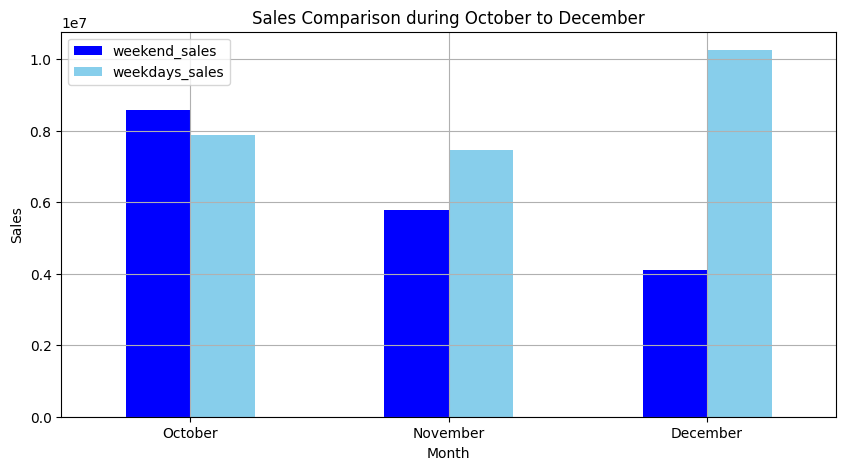

In [62]:
# Creating a bar chart
avg_sales.plot(
    x='month',
    y=['weekend_sales', 'weekdays_sales'],
    kind = 'bar',
    figsize = (10,5),
    title = 'Sales Comparison during October to December',
    xlabel = 'Month',
    ylabel = 'Sales',
    grid = True,
    rot = 0,
    color = ['blue', 'skyblue'])

## `Answer No 4.2`

In [63]:
 # Write your code below. More than 1 code block can be used.
weekend_sales = avg_sales['weekend_sales'].mean().round(2)
weekdays_sales = avg_sales['weekdays_sales'].mean().round(2)
growth = (weekdays_sales - weekend_sales).round(2)
percentage = (growth / weekend_sales * 100).round(2)

print(
    'Average weekend sales October - December =', weekend_sales,
    '\nAverage weekdays sales October - December =', weekdays_sales,
    '\nGrowth =', growth,
    '\nPercentage of growth =', percentage, '%'
)

Average weekend sales October - December = 6147516.67 
Average weekdays sales October - December = 8522949.2 
Growth = 2375432.53 
Percentage of growth = 38.64 %
